# Admir Makas  
### STT-6660 HW #5

In [211]:
import numpy as np
import scipy as sp
import sympy as sy
import warnings

%matplotlib inline
import matplotlib.pyplot as plt

sy.init_printing(use_latex='mathjax')
from IPython.display import display, Math, Latex

## Problem 3.6

<img src="Prob3_6.jpg" width="550">  

### **Part a: Get residuals and construct a box plot**

In [212]:
#Define the data

Y = sy.Matrix([199, 205, 196, 200, 218, 220, 215, 223, \
               237, 234, 235, 230, 250, 248, 253, 246]).T
X = sy.Matrix([16, 16, 16, 16, 24, 24, 24, 24, 32, 32, \
               32, 32, 40, 40, 40, 40]).T

**Get predicted values**

In [213]:
Yhat = 2.0344*X + 168.6*np.ones((1,16))

**Get residuals $e_i$**

In [306]:
e = Y-Yhat
display(Math(r'e_i = '))
e.T.evalf(5)

<IPython.core.display.Math object>

⎡-2.1504⎤
⎢       ⎥
⎢3.8496 ⎥
⎢       ⎥
⎢-5.1504⎥
⎢       ⎥
⎢-1.1504⎥
⎢       ⎥
⎢0.5744 ⎥
⎢       ⎥
⎢2.5744 ⎥
⎢       ⎥
⎢-2.4256⎥
⎢       ⎥
⎢5.5744 ⎥
⎢       ⎥
⎢3.2992 ⎥
⎢       ⎥
⎢0.2992 ⎥
⎢       ⎥
⎢1.2992 ⎥
⎢       ⎥
⎢-3.7008⎥
⎢       ⎥
⎢ 0.024 ⎥
⎢       ⎥
⎢-1.976 ⎥
⎢       ⎥
⎢ 3.024 ⎥
⎢       ⎥
⎣-3.976 ⎦

### **Here is the boxplot for the residuals**

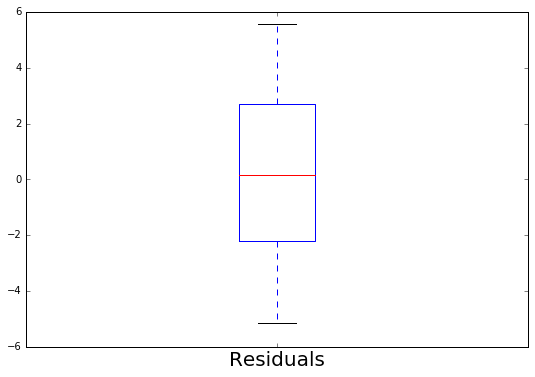

In [307]:
e2=np.array(e[:],dtype=float)
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(e2)
ax.set_xticklabels(['Residuals'], fontsize=20)

### **From the boxplot above, it appears that the residuals are normally distributed**

### **Part b: plot residuals against fitted values**

### **Below is plot of Residuals vs. $\hat{Y}$**

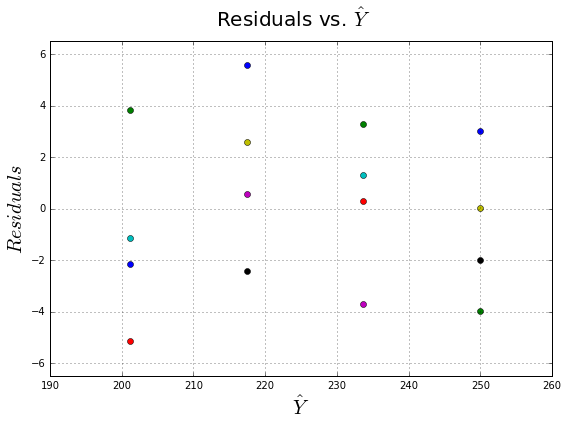

In [308]:
fig=plt.figure(1, figsize=(9, 6))

ax = fig.add_subplot(111)
ax.plot(Yhat, e, "o")

#Plot annotations
axis_span=[190, 260, -6.5, 6.5]
plt.axis(axis_span)

fig.suptitle('Residuals vs. $\hat{Y}$', fontsize=20)
plt.xlabel('$\hat{Y}$', fontsize=20)
plt.ylabel('$Residuals$', fontsize=20)
plt.grid()

### **No unusual departures from the X-axis are noticable. The assumption of constant variance seems to apply for this data-set.**

### **Part c: Plot normal plot for the residuals**

### **Below is normal plot**

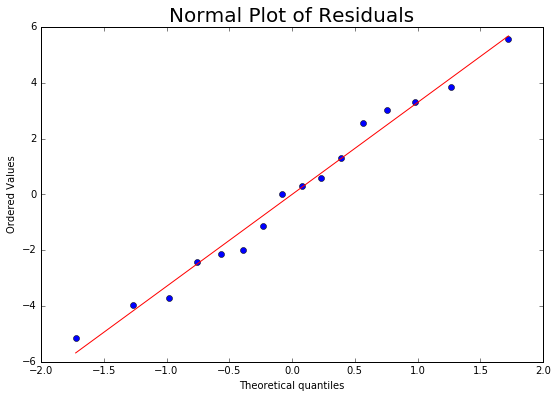

In [217]:
from scipy import stats
fig=plt.figure(1, figsize=(9, 6))

ax = fig.add_subplot(111)
res = stats.probplot(e2, plot=ax)
ax.set_title("Normal Plot of Residuals", fontsize=20)

**Here is the correlation coefficient**

In [287]:
ans = sp.stats.pearsonr(res[0][0], res[0][1])
display(Math(r'Correlation\ Coefficient = '))
display(ans[0])

<IPython.core.display.Math object>

0.992196616622

### **Part e: Use Brown-Forsythe test to determine if error variance varies with $X$**

In [309]:
display(Math(r"""The\ residuals\ are\ divided\ into\ two\ data\ 
sets\ set_1\ and\ set_2\ before\ the\ test\ is\ performed"""))
set1 = e2[0:8]
display(set1)
set2 = e2[8:17]
display(set2)

<IPython.core.display.Math object>

array([-2.1504,  3.8496, -5.1504, -1.1504,  0.5744,  2.5744, -2.4256,
        5.5744])

array([ 3.2992,  0.2992,  1.2992, -3.7008,  0.024 , -1.976 ,  3.024 ,
       -3.976 ])

**Get the medians for the two data sets**

In [300]:
d1Med = np.median(set1)
d2Med = np.median(set2)

display(d1Mean)
display(d2Mean)

-1.1504

0.2992

In [314]:
d1 = abs(np.add(set1, -np.ones(8)*d1Med))
d2 = abs(np.add(set2, -np.ones(8)*d2Med))

display(d1)
display(d2)

array([ 1.    ,  5.    ,  4.    ,  0.    ,  1.7248,  3.7248,  1.2752,
        6.7248])

array([ 3.    ,  0.    ,  1.    ,  4.    ,  0.2752,  2.2752,  2.7248,
        4.2752])

**Perform the variance test**

In [317]:
stats.levene(d1, d2, center='median')

(1.68009650173, 0.215872449872)

**Formal test set-up:**  
**$H_0$: $\sigma^2$ is constant**  
**$H_a$: $\sigma^2$ is not constant**

**The above result gives the t statistic and the p-value.**  

**$t_{obs}$ = 1.680**

**$p-value$ = 0.2158**

**Since $p-value$ $\gt$ $0.05$ we cannot reject the null hypothesis. Therfore, the variance seems to be constant.**

## Problem 3.11

<img src="Prob3_11.jpg" width="600">  

In [220]:
# Define data

X2 = sy.Matrix([-1, 0, 1, -1, 0, 1, -1, 0, 1]).T
e = sy.Matrix([0.5, 2.1, -3.4, 0.3, -1.7, 4.2, -0.6, 2.6, -4.0]).T
E_sq = e.multiply_elementwise(e)
# Square the residuals
e_sq = np.array(np.power(e[:],2),dtype=float)
x2 = np.array(X2[:],dtype=float)

display(X2)
display(e)
display(E_sq)

[-1  0  1  -1  0  1  -1  0  1]

[0.5  2.1  -3.4  0.3  -1.7  4.2  -0.6  2.6  -4.0]

[0.25  4.41  11.56  0.09  2.89  17.64  0.36  6.76  16.0]

### **Part a: Plot residuals vs. X**

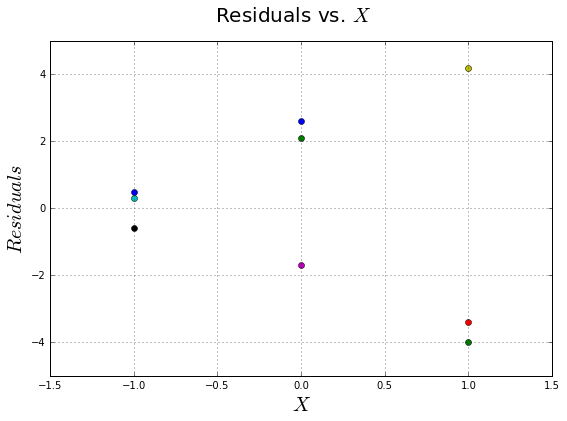

In [221]:
fig=plt.figure(1, figsize=(9, 6))

ax = fig.add_subplot(111)
ax.plot(X2, e_311, "o")

#Plot annotations
axis_span=[-1.5, 1.5, -5, 5]
plt.axis(axis_span)

fig.suptitle('Residuals vs. $X$', fontsize=20)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$Residuals$', fontsize=20)
plt.grid()

**Based on the residual plot above, the variance is not constant.**

In [222]:
Xbar = np.mean(X2).evalf(5)
display(Math(r'\bar{X} = '))
display(Xbar)

<IPython.core.display.Math object>

0

In [223]:
e_bar = np.mean(E_sq).evalf(3)
display(Math(r'\bar{e^2} = '))
display(e_bar)

<IPython.core.display.Math object>

6.66

In [224]:
Sxy = np.sum(np.multiply(X2,E_sq)) - (1/9)*(np.sum(X2)*np.sum(E_sq))
display(Math(r'S_{xy} = '))
display(Sxy)

<IPython.core.display.Math object>

44.5000000000000

In [225]:
Sxx = np.sum(np.multiply(X2,X2)) - (1/9)*(np.sum(X2)*np.sum(X2))
display(Math(r'S_{xx} = '))
display(Sxx)

<IPython.core.display.Math object>

6

In [226]:
b1 = (Sxy/Sxx).evalf(5)
display(Math(r'b_{1} = '))
display(b1)

<IPython.core.display.Math object>

7.4167

In [227]:
b0 = (e_bar - b1*Xbar).evalf(4)
display(Math(r'b_{0} = '))
display(b0)

<IPython.core.display.Math object>

6.662

### **Regression Function is:**  

### **$\hat{Y} = 7.4167X + 6.662$**

### **Next plot the data and the corresponding regression model.**  

### **From the figure below the regression model fits the data reasonably well.**

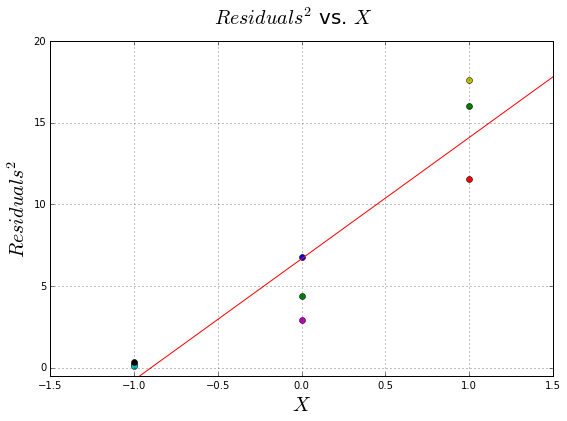

In [228]:
Xd=np.linspace(-2.0,2.0,200)

Y1 = 7.4167*Xd + 6.662;

fig=plt.figure(1, figsize=(9, 6))

ax = fig.add_subplot(111)
ax.plot(X2, E_sq, "o")
ax.plot(Xd, Y1)

#Plot annotations
axis_span=[-1.5, 1.5, -0.5, 20]
plt.axis(axis_span)

fig.suptitle('$Residuals^2$ vs. $X$', fontsize=20)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$Residuals^2$', fontsize=20)
plt.grid()

In [229]:
SSTO = (np.sum(np.power((E_sq-np.ones((1,9))*e_bar),2))).evalf(4)
display(Math(r'SSTO = '))
display(SSTO)

<IPython.core.display.Math object>

375.0

In [230]:
e_est1 = np.multiply(np.ones((1,9))*7.4167, X2)
e_est = np.add(e_est1, np.ones((1,9))*6.662)

In [231]:
SSE1 = np.sum(np.power((E_sq-e_est),2))
display(Math(r'SSE1 = '))
display(SSE1)

<IPython.core.display.Math object>

44.9926893400000

In [232]:
SSR = (SSTO-SSE1).evalf(6)
display(Math(r'SSR = SSTO - SSE'))
display(SSR)

<IPython.core.display.Math object>

330.042

In [233]:
SSE = np.sum(E_sq)
display(Math(r'SSE = '))
display(SSE)

<IPython.core.display.Math object>

59.9600000000000

Chi2Obs = ((SSR/2)/(SSE/9)**2).evalf(4)
display(Math(r'\chi^{2}_{BP} = '))
display(Chi2Obs)

In [234]:
from scipy.stats import chi2
display(Math(r'\chi^{2}_{(0.95, 1)} = '))
chi2.ppf(0.95,1)

<IPython.core.display.Math object>

3.84145882069

**Since $\chi^{2}_{BP}$ $\lt$ $\chi^{2}_{(0.95, 1)}$ we fail to reject the null hypothesis. Therefore, based on this test variance is assumned to be equal. Looking at the plot of $e_{i}^{2}$ vs. $X$ there is a clear slope so more samples are needed in order to improve the accuracy of the test**

## Problem 3.14

<img src="Prob3_14.jpg" width="600">  

### **Part a: Perform F test for lack of fit**

In [235]:
#Define the data

Y = sy.Matrix([199, 205, 196, 200, 218, 220, 215, 223, \
               237, 234, 235, 230, 250, 248, 253, 246]).T
X = sy.Matrix([16, 16, 16, 16, 24, 24, 24, 24, 32, 32, \
               32, 32, 40, 40, 40, 40]).T

In [236]:
Yhat = 2.0344*X + 168.6*np.ones((1,16))

In [237]:
mean1 = np.mean(Y[0:4])
mean2 = np.mean(Y[4:8])
mean3 = np.mean(Y[8:12])
mean4 = np.mean(Y[12:16])

display(mean1)
display(mean2)
display(mean3)
display(mean4)

200

219

234

997/4

**SSPE calculated below**

In [238]:
SSPE = np.sum(np.power((np.array(Y[0:4],dtype=float)-np.ones(4)*mean1),2)) + \
np.sum(np.power((np.array(Y[4:8],dtype=float)-np.ones(4)*mean2),2)) + \
np.sum(np.power((np.array(Y[8:12],dtype=float)-np.ones(4)*mean3),2)) + \
np.sum(np.power((np.array(Y[12:16],dtype=float)-np.ones(4)*mean4),2))

display(Math(r'SSPE = '))
SSPE.evalf(4)

<IPython.core.display.Math object>

128.8

### **Now get SSLF from expression SSLF = SSE-SSPE**

**Start with obtaining $S_{yy}$ in order to get $SSE = S_{yy} - b_{1}S_{xy}$**  

**$b_1$ and $S_{xy}$ are obtained from HW #4:**  

- **$b_1$ = 2.0344**
- **$S_{xy}$ = 2604.0**

In [239]:
Syy = np.sum(np.multiply(Y,Y)) - (1/16)*(np.sum(Y)*np.sum(Y))
display(Math(r'S_{yy} = '))
display(Syy)

<IPython.core.display.Math object>

5443.93750000000

In [240]:
display(Math(r'SSE = '))
SSE = Syy - 2.0344*2604.0
display(SSE.evalf(4))

<IPython.core.display.Math object>

146.4

In [241]:
display(Math(r'SSLF = '))
SSLF = SSE-SSPE
display(SSLF.evalf(4))

<IPython.core.display.Math object>

17.61

**Below is the ANOVA table**

<img src="ANOVA_tbl.jpg" width="600">  

In [242]:
display(Math(r'F_{obs} = '))
Fobs = (8.81/10.733)
display(Fobs)

<IPython.core.display.Math object>

0.8208329451225194

In [243]:
display(Math(r'Get\ F(0.99, 2, 12)'))
from scipy.stats import f
f.ppf(0.99, 2, 12)

<IPython.core.display.Math object>

6.92660814019

**Since $F_{obs} = 0.8208$ $\lt$ $F = 6.927$ and is therefore not in the rejection region we conclude that $H_0$ cannot be rejected.**

### **Part c:**

**The F-test only tests if the chosen linear model is fitting the supplied data adequately. It does not provide, on its own, an idication of what model is appropriare should the linear model fail to fit the data.**  

**One should plot the given data and the subject residuals in order to determine what fit looks appropriate and proceed accordingly.**

## Problem 3.15

<img src="Prob3_15.jpg" width="600">  

### **Part a: Fit linear model**

In [244]:
lines = np.loadtxt("CH03PR15.txt")
lines

array([[ 0.07,  9.  ],
       [ 0.09,  9.  ],
       [ 0.08,  9.  ],
       [ 0.16,  7.  ],
       [ 0.17,  7.  ],
       [ 0.21,  7.  ],
       [ 0.49,  5.  ],
       [ 0.58,  5.  ],
       [ 0.53,  5.  ],
       [ 1.22,  3.  ],
       [ 1.15,  3.  ],
       [ 1.07,  3.  ],
       [ 2.84,  1.  ],
       [ 2.57,  1.  ],
       [ 3.1 ,  1.  ]])

In [245]:
Xbar = np.mean(lines[:,1])
display(Math(r'\bar{X} = '))
display(Xbar)

<IPython.core.display.Math object>

5.0

In [246]:
Ybar = np.mean(lines[:,0])
display(Math(r'\bar{Y} = '))
display(Ybar)

<IPython.core.display.Math object>

0.955333333333

In [247]:
Sxy = np.sum(np.multiply(lines[:,1],lines[:,0])) \
    - (1/15)*(np.sum(lines[:,1])*np.sum(lines[:,0]))
display(Math(r'S_{xy} = '))
display(Sxy)

<IPython.core.display.Math object>

-38.88

In [248]:
Sxx = np.sum(np.multiply(lines[:,1],lines[:,1])) \
    - (1/15)*(np.sum(lines[:,1])*np.sum(lines[:,1]))
display(Math(r'S_{xx} = '))
display(Sxx)

<IPython.core.display.Math object>

120.0

In [249]:
b1 = (Sxy/Sxx)
display(Math(r'b_{1} = '))
display(b1)

<IPython.core.display.Math object>

-0.324

In [250]:
b0 = (Ybar - b1*Xbar)
display(Math(r'b_{0} = '))
display(b0)

<IPython.core.display.Math object>

2.57533333333

### **Regression Function is:**  

### **$\hat{Y} = -0.324X + 2.5753$**

### **Next plot the data and the corresponding regression model.**  

### **From the figure below the regression model fits the data quite well.**

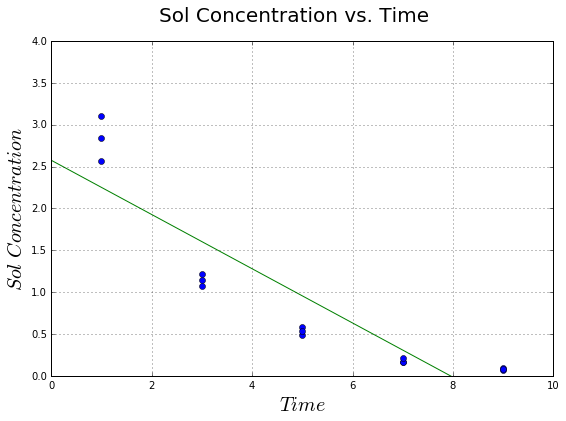

In [251]:
X1=np.linspace(0.0,10.0,200)

Y1 = -0.324*X1 + 2.5753;

fig=plt.figure(1, figsize=(9, 6))

ax = fig.add_subplot(111)
ax.plot(lines[:,1], lines[:,0], "o")
ax.plot(X1, Y1)

#Plot annotations
axis_span=[0, 10, 0, 4]
plt.axis(axis_span)

fig.suptitle('Sol Concentration vs. Time', fontsize=20)
plt.xlabel('$Time$', fontsize=20)
plt.ylabel('$Sol\ Concentration$', fontsize=20)
plt.grid()

### **Part b: Perform F-test for lack of fit**

In [252]:
mean1 = np.mean(lines[0:3,0])
mean2 = np.mean(lines[3:6,0])
mean3 = np.mean(lines[6:9,0])
mean4 = np.mean(lines[9:12,0])
mean5 = np.mean(lines[12:15,0])

display(mean1)
display(mean2)
display(mean3)
display(mean4)
display(mean5)

0.08

0.18

0.533333333333

1.14666666667

2.83666666667

In [253]:
SSPE = np.sum(np.power((lines[0:3,0]-np.ones(3)*mean1),2)) + \
np.sum(np.power((lines[3:6,0]-np.ones(3)*mean2),2)) + \
np.sum(np.power((lines[6:9,0]-np.ones(3)*mean3),2)) + \
np.sum(np.power((lines[9:12,0]-np.ones(3)*mean4),2)) + \
np.sum(np.power((lines[12:15,0]-np.ones(3)*mean5),2))

display(Math(r'SSPE = '))
SSPE

<IPython.core.display.Math object>

0.1574

### **Now get SSLF from expression SSLF = SSE-SSPE**

**Start with obtaining $S_{yy}$ in order to get $SSE = S_{yy} - b_{1}S_{xy}$**  

In [254]:
Syy = np.sum(np.multiply(lines[:,0],lines[:,0])) \
    - (1/15)*(np.sum(lines[:,0])*np.sum(lines[:,0]))
display(Math(r'S_{yy} = '))
display(Syy)

<IPython.core.display.Math object>

15.5217733333

In [255]:
display(Math(r'SSE = '))
SSE = Syy - b1*Sxy
display(SSE)

<IPython.core.display.Math object>

2.92465333333

In [256]:
display(Math(r'SSLF = '))
SSLF = SSE-SSPE
display(SSLF)

<IPython.core.display.Math object>

2.76725333333

**Below is the ANOVA table**

<img src="ANOVA_tbl2.jpg" width="600">  

In [257]:
display(Math(r'F_{obs} = '))
Fobs = (0.9223/0.01574)
display(Fobs)

<IPython.core.display.Math object>

58.595933926302415

In [258]:
display(Math(r'Get\ F(0.975, 3, 10)'))
from scipy.stats import f
f.ppf(0.975, 3, 10)

<IPython.core.display.Math object>

4.82562149341

**Since $F_{obs} = 58.60$ $\lt$ $F = 4.826$ and is therefore in the rejection region we conclude that $H_0$ cannot be accepted.**

### **Part c:**

**The F-test only tests if the chosen linear model is fitting the supplied data adequately. It does not provide, on its own, an idication of what model is appropriare should the linear model fail to fit the data.**  

**One should plot the given data and the subject residuals in order to determine what fit looks appropriate and proceed accordingly. For this case it looks like a second order fit is more appropriate.**